In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Load the Data
features_df = pd.read_csv('LabeledData.csv', index_col='label')


In [8]:
print(features.head(5))

               0         1         2         3          4         5         6  \
label                                                                           
Lavani  0.041197  5.246215  0.756234  0.857798  87.441172  0.038027  5.306097   
Lavani  0.022393  5.952968  0.684569  1.466163  87.042359  0.021713  6.100612   
Lavani  0.038930  5.209987  0.786378  0.713919  87.228998  0.039007  5.175563   
Lavani  0.020993  6.122227  0.642724  2.178858  86.355677  0.015064  6.520416   
Lavani  0.060425  4.628222  0.789587  0.604692  84.420080  0.037851  5.301367   

               7         8          9  ...        110        111        112  \
label                                  ...                                    
Lavani  0.745138  0.976015  87.497105  ...  -5.442336  -6.518619  -8.488288   
Lavani  0.649869  1.900330  86.880251  ...   1.541839   4.693018   3.475749   
Lavani  0.776867  0.710232  86.424247  ...  -2.771344  -8.376707 -14.815996   
Lavani  0.600211  2.814376  86.817248

In [9]:
# Display Basic Information
print("Basic Information:")
print(features_df.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 790 entries, Lavani to NationalAnthem
Columns: 120 entries, 0 to 119
dtypes: float64(120)
memory usage: 746.8+ KB
None


In [10]:
# Check for Missing Values
print("\nMissing Values:")
print(features_df.isnull().sum())


Missing Values:
0      0
1      0
2      0
3      0
4      0
      ..
115    0
116    0
117    0
118    0
119    0
Length: 120, dtype: int64


In [11]:
# Summary Statistics
print("\nSummary Statistics:")
print(features_df.describe())


Summary Statistics:
                0           1           2           3           4           5  \
count  790.000000  790.000000  790.000000  790.000000  790.000000  790.000000   
mean     0.047297    5.130135    0.784519    0.847278   86.290650    0.037318   
std      0.024805    0.537872    0.065979    0.514276    1.137576    0.023335   
min      0.013646    2.002552    0.534124    0.083857   81.907032    0.013276   
25%      0.033681    4.816255    0.740231    0.505170   85.601071    0.024849   
50%      0.041663    5.186837    0.781925    0.756205   86.449434    0.032022   
75%      0.054401    5.485996    0.826926    1.067249   87.160107    0.043888   
max      0.426104    6.787183    0.960848    5.096290   88.913501    0.414843   

                6           7           8           9  ...         110  \
count  790.000000  790.000000  790.000000  790.000000  ...  790.000000   
mean     5.461519    0.732497    1.135957   85.946220  ...   -4.731259   
std      0.574730    0.0621

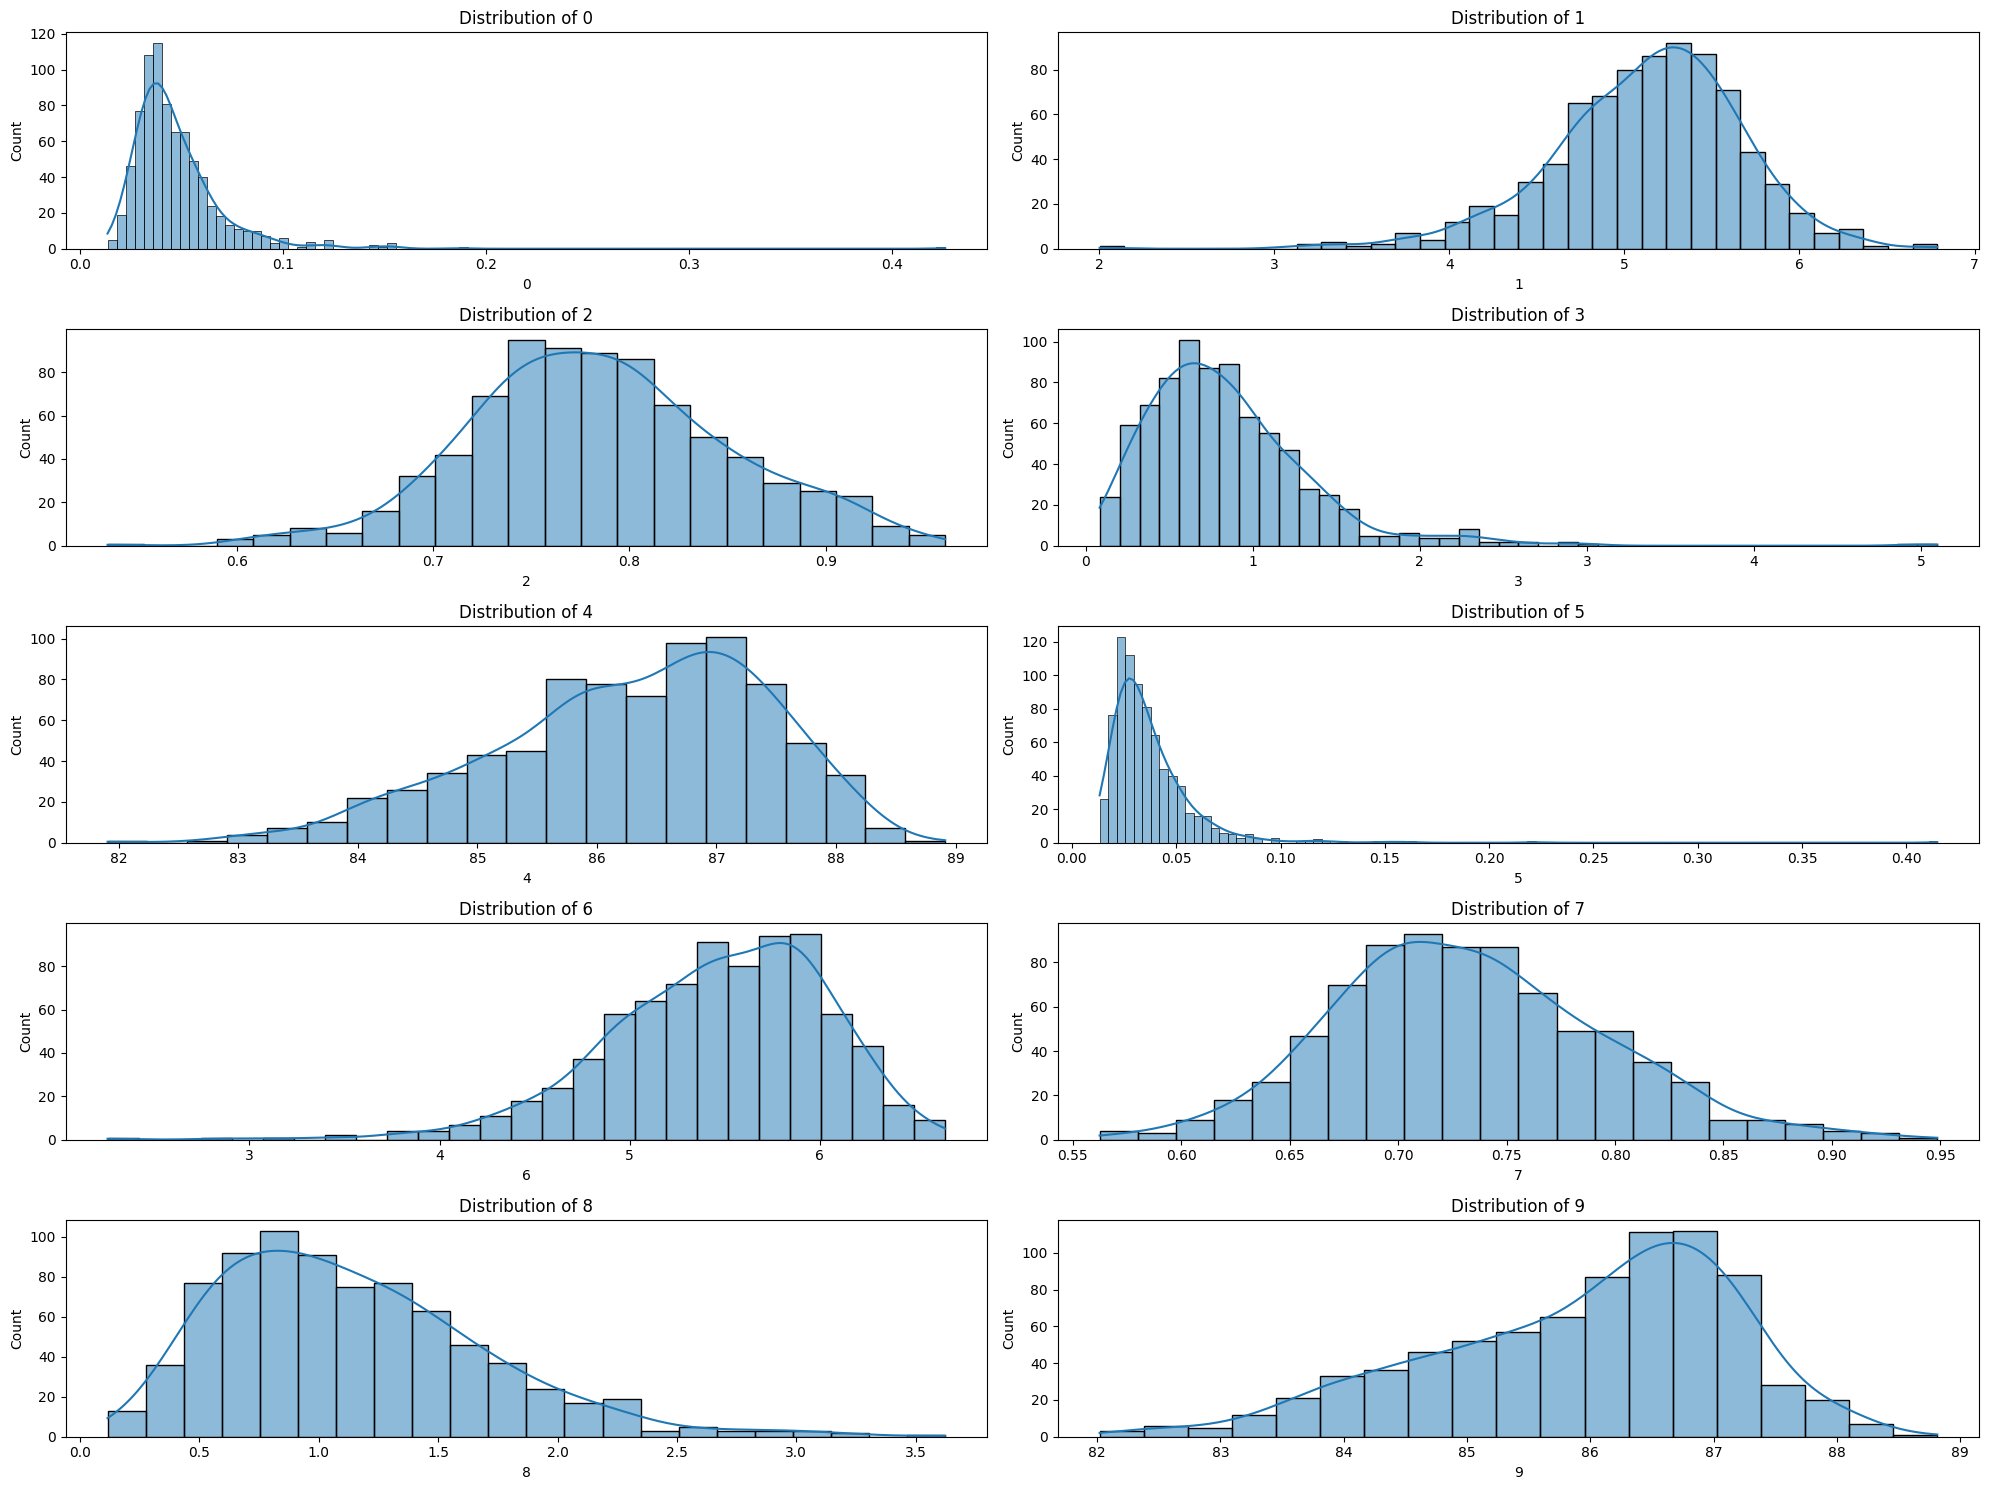

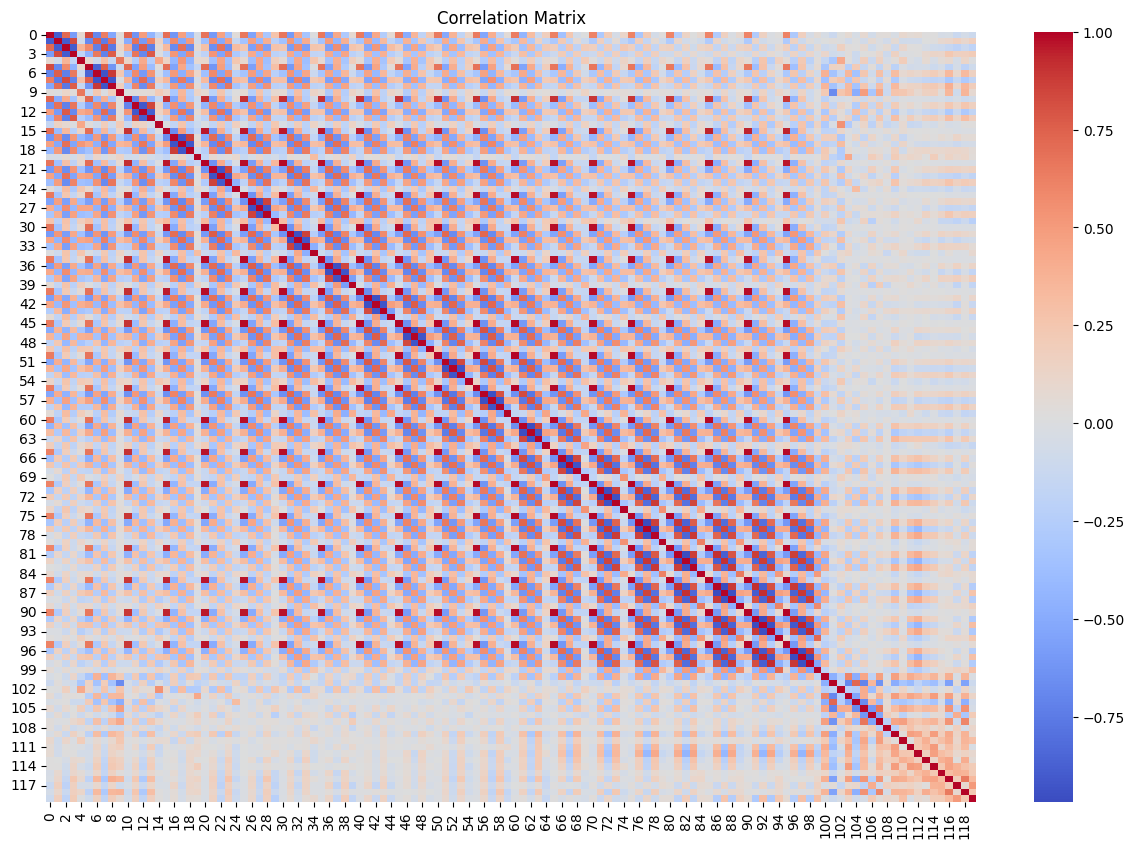

In [14]:
import seaborn as sns

# Visualize Feature Distributions
plt.figure(figsize=(20, 15))
for i, column in enumerate(features_df.columns[:10], 1):
    plt.subplot(5, 2, i)
    sns.histplot(features_df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Correlation Matrix
plt.figure(figsize=(15, 10))
correlation_matrix = features_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Outliers Detected:
                       0         1         2         3          4         5  \
label                                                                         
Lavani          0.020993  6.122227  0.642724  2.178858  86.355677  0.015064   
Lavani          0.060425  4.628222  0.789587  0.604692  84.420080  0.037851   
Lavani          0.021734  5.983600  0.694102  1.521596  84.761340  0.019124   
Lavani          0.026992  5.761366  0.721482  1.255369  86.506683  0.023123   
Lavani          0.038864  5.176033  0.797070  0.599709  86.465318  0.036624   
...                  ...       ...       ...       ...        ...       ...   
NationalAnthem  0.122247  3.714432  0.905286  0.201434  85.038037  0.069039   
NationalAnthem  0.154436  3.335279  0.942163  0.130107  88.913501  0.128235   
NationalAnthem  0.031110  5.468558  0.734323  0.745092  85.915807  0.030077   
NationalAnthem  0.149888  3.382416  0.905335  0.192864  85.095635  0.222155   
NationalAnthem  0.061288  4.6702

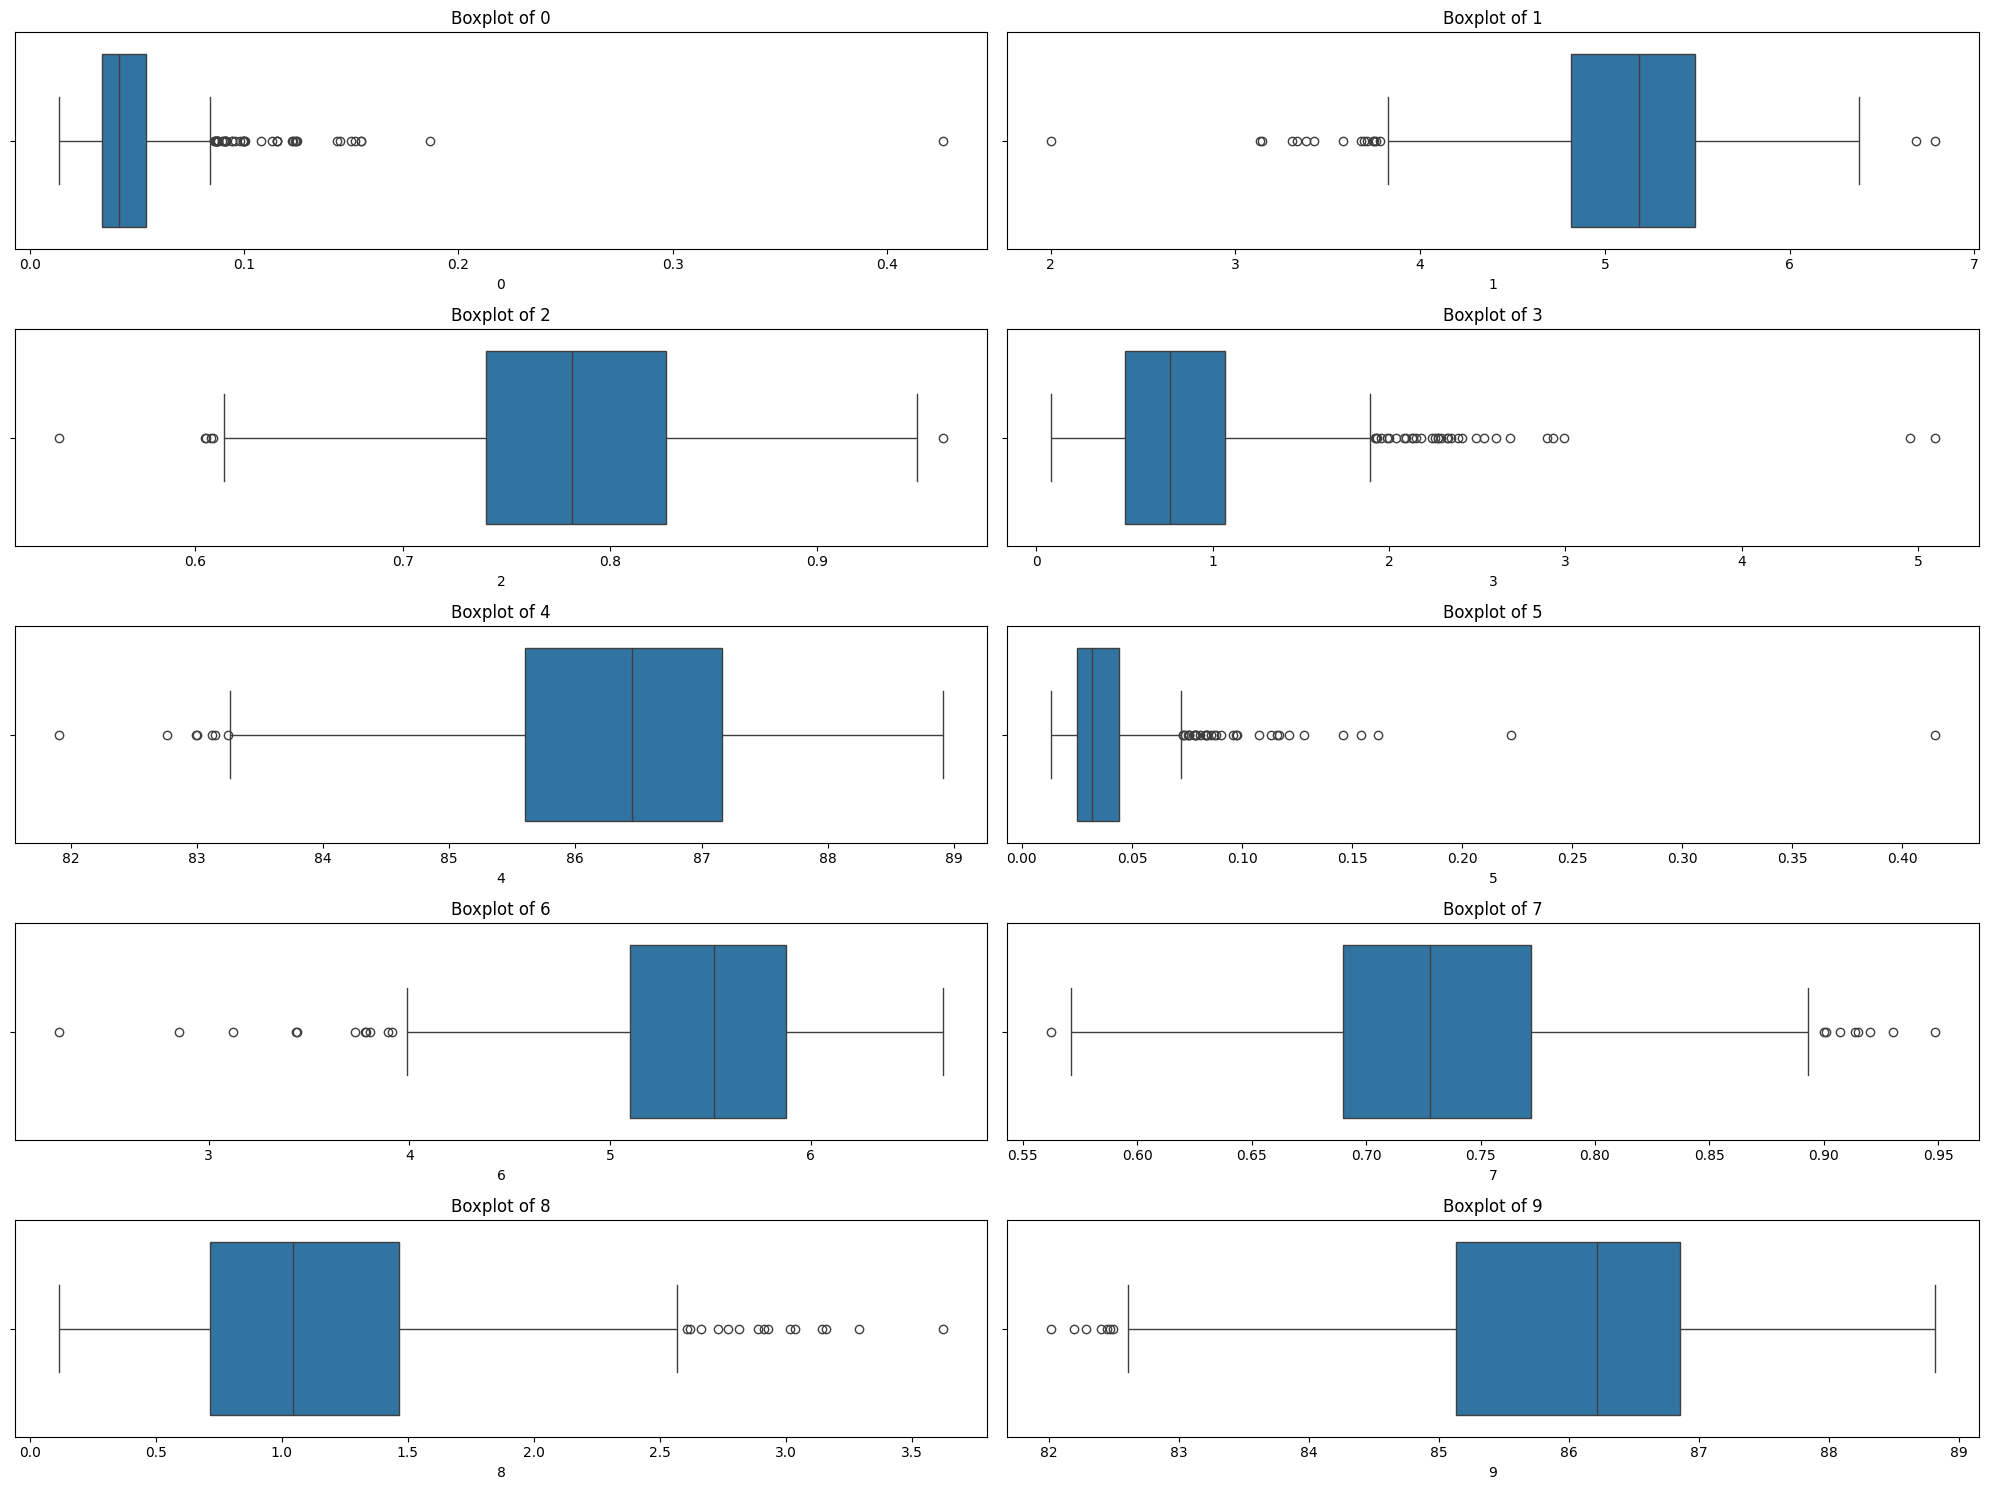

In [16]:
from scipy import stats

# Outlier Detection using Z-score
z_scores = np.abs(stats.zscore(features_df))
outliers = (z_scores > 3).sum(axis=1)
outliers_df = features_df[outliers > 0]

print("\nOutliers Detected:")
print(outliers_df)

# Visualize Outliers
plt.figure(figsize=(20, 15))
for i, column in enumerate(features_df.columns[:10], 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=features_df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


Outliers Removed DataFrame:
                       0         1         2         3          4         5  \
label                                                                         
Lavani          0.041197  5.246215  0.756234  0.857798  87.441172  0.038027   
Lavani          0.022393  5.952968  0.684569  1.466163  87.042359  0.021713   
Lavani          0.038930  5.209987  0.786378  0.713919  87.228998  0.039007   
Lavani          0.020993  6.122227  0.642724  2.178858  86.355677  0.015064   
Lavani          0.060425  4.628222  0.789587  0.604692  84.420080  0.037851   
...                  ...       ...       ...       ...        ...       ...   
NationalAnthem  0.039627  5.332924  0.796043  0.720849  86.598678  0.029123   
NationalAnthem  0.095713  4.008360  0.905102  0.222478  87.490396  0.088268   
NationalAnthem  0.069989  4.346523  0.918798  0.173212  87.930736  0.041330   
NationalAnthem  0.069251  4.445211  0.898940  0.239199  87.014793  0.048802   
NationalAnthem  0.06128

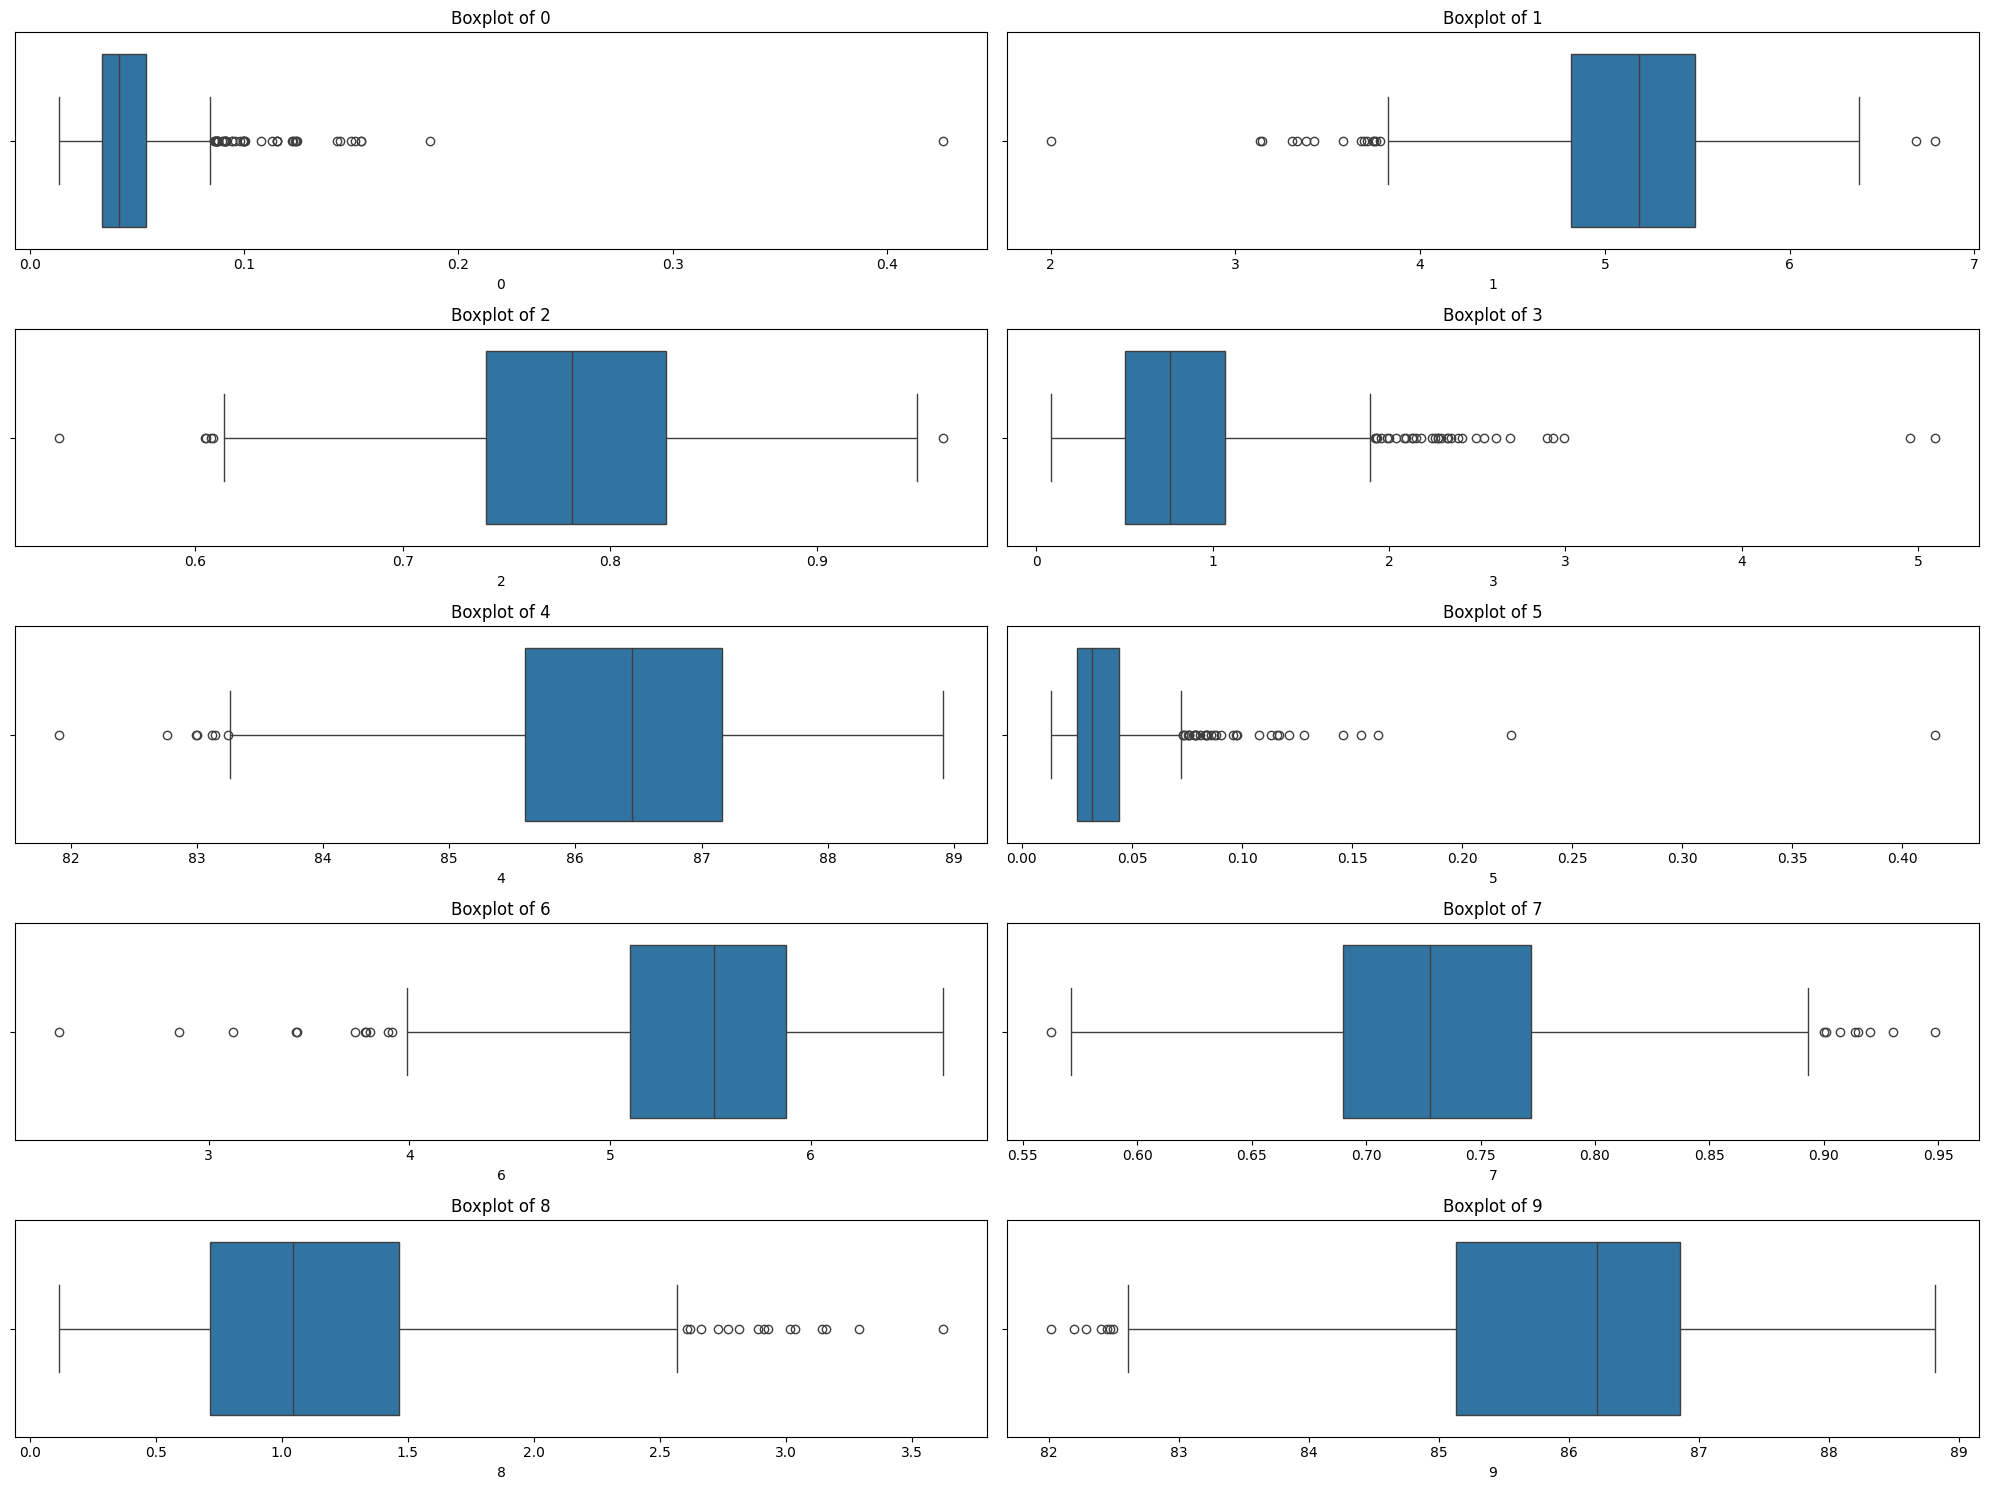

In [53]:
# Outlier Detection using Z-score
z_scores = np.abs(stats.zscore(features_df))
outliers = (z_scores > 3).any(axis=1)
outliers_df = features_df[outliers]


# features_df_no_outliers = features_df[~outliers]
features_df_no_outliers = features_df

print("\nOutliers Removed DataFrame:")
print(features_df_no_outliers)

# Visualize Outliers
plt.figure(figsize=(20, 15))
for i, column in enumerate(features_df.columns[:10], 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=features_df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = features_df.columns
vif_data["VIF"] = [variance_inflation_factor(features_df.values, i) for i in range(len(features_df.columns))]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Variance Inflation Factor (VIF):
    feature           VIF
0         0    284.409277
1         1  10705.802842
2         2   7886.895240
3         3     71.081038
4         4  45071.035571
..      ...           ...
115     115      5.267558
116     116      4.074448
117     117      3.808786
118     118      3.855702
119     119      3.246187

[120 rows x 2 columns]


In [55]:
# Function to calculate VIF and remove features with high VIF
def calculate_vif(df, threshold=5.0):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    
    while vif_data["VIF"].max() > threshold:
        max_vif_feature = vif_data.loc[vif_data["VIF"].idxmax(), "feature"]
        print(f"Dropping feature '{max_vif_feature}' with VIF: {vif_data['VIF'].max()}")
        df = df.drop(columns=[max_vif_feature])
        vif_data = pd.DataFrame()
        vif_data["feature"] = df.columns
        vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    
    return df, vif_data

# Reduce columns based on VIF
reduced_features_df, final_vif_data = calculate_vif(features_df_no_outliers)

print("\nFinal Variance Inflation Factor (VIF):")
print(final_vif_data)

print("\nReduced Features DataFrame:")
print(reduced_features_df.head())

Dropping feature '81' with VIF: 601863.1286455331
Dropping feature '56' with VIF: 581736.2457470762
Dropping feature '61' with VIF: 495175.07260182354
Dropping feature '86' with VIF: 490797.6172172462
Dropping feature '76' with VIF: 446544.26901886606
Dropping feature '51' with VIF: 443456.2534113281
Dropping feature '41' with VIF: 411019.183720234
Dropping feature '91' with VIF: 379844.5010450364
Dropping feature '71' with VIF: 360628.34831856645
Dropping feature '46' with VIF: 327979.8199428914
Dropping feature '36' with VIF: 288647.7916444485
Dropping feature '96' with VIF: 271955.25435231853
Dropping feature '66' with VIF: 219875.1678799723
Dropping feature '31' with VIF: 169028.792792765
Dropping feature '26' with VIF: 102546.44056737976
Dropping feature '21' with VIF: 94434.23949305063
Dropping feature '44' with VIF: 63121.74476937102
Dropping feature '64' with VIF: 53970.673977339
Dropping feature '89' with VIF: 52609.53859418471
Dropping feature '39' with VIF: 49985.62214194372

In [56]:
print("\nFinal Variance Inflation Factor (VIF):")
print(final_vif_data)


Final Variance Inflation Factor (VIF):
   feature       VIF
0        3  3.101450
1       95  1.795274
2      102  3.880635
3      103  4.746565
4      104  2.442275
5      106  3.704059
6      107  4.626640
7      108  2.833604
8      109  3.044997
9      110  3.419302
10     111  2.585586
11     112  2.423611
12     113  3.518065
13     114  2.588059
14     115  3.909883
15     116  2.782977
16     117  3.074375
17     118  2.619815
18     119  2.121889


In [57]:
print("\nReduced Features DataFrame:")
print(reduced_features_df.head())


Reduced Features DataFrame:
               3        95        102        103        104        106  \
label                                                                    
Lavani  0.857798  0.018643 -22.506236  -8.558044   7.332756  -6.335575   
Lavani  1.466163  0.010550  -5.286662  47.921184  -0.752779  -6.504270   
Lavani  0.713919  0.019572 -25.869128 -28.400593  24.322159  -6.959046   
Lavani  2.178858  0.014852  -4.902011  41.676414  24.346102  -3.201913   
Lavani  0.604692  0.013511 -30.679322  -5.396593   1.557824 -17.155400   

              107        108        109        110        111        112  \
label                                                                      
Lavani   1.877846 -13.454720 -10.357737  -5.442336  -6.518619  -8.488288   
Lavani  11.631562  -7.400476  10.974143   1.541839   4.693018   3.475749   
Lavani   7.531301  -4.815047 -11.793943  -2.771344  -8.376707 -14.815996   
Lavani -28.176609 -22.288918  14.619373  11.676158 -10.155812   0.768609

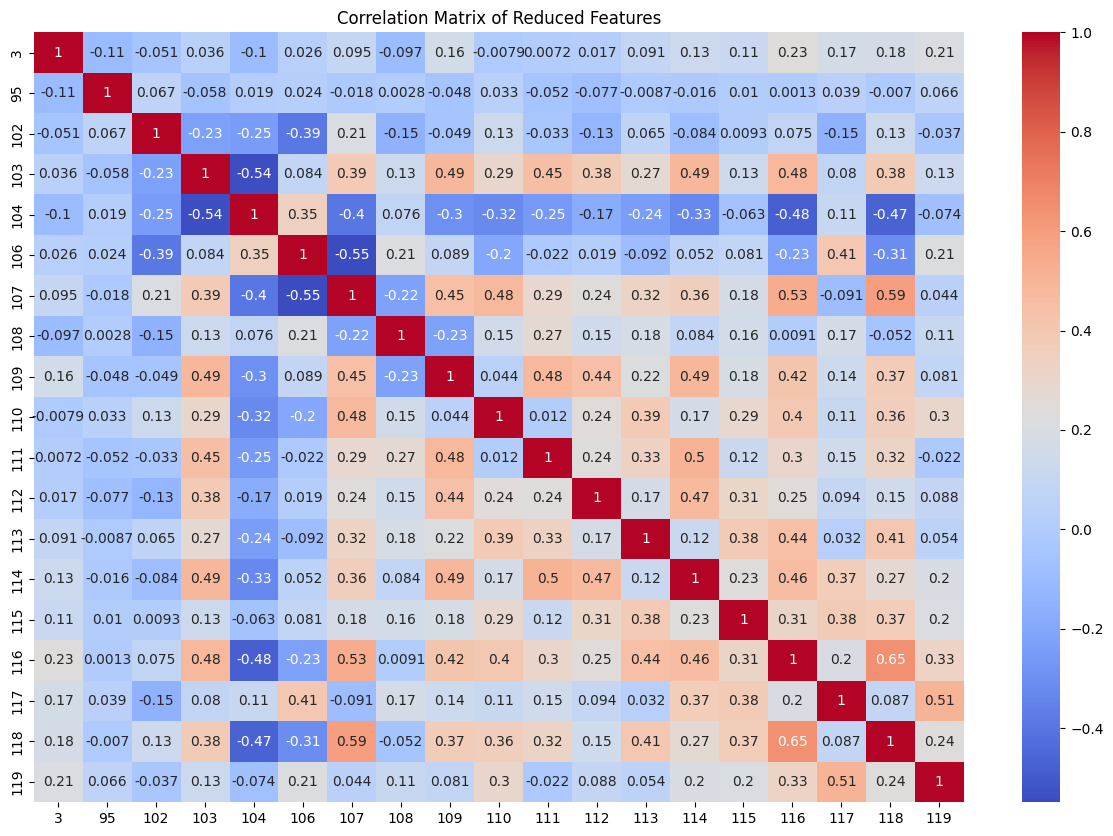

In [58]:
# Correlation Matrix of Reduced Features
plt.figure(figsize=(15, 10))
reduced_correlation_matrix = reduced_features_df.corr()
sns.heatmap(reduced_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Reduced Features')
plt.show()

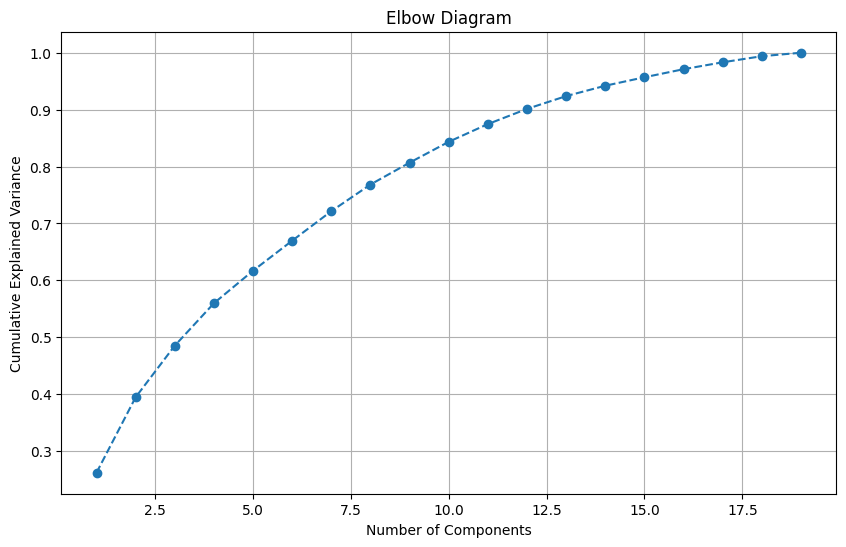

Optimal number of components: 12


In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(reduced_features_df)


# Perform PCA
pca = PCA()
pca.fit(scaled_features)

# Plot the explained variance ratio to create the elbow diagram
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Diagram')
plt.grid(True)
plt.show()

# Determine the optimal number of components (e.g., where the explained variance exceeds 90%)
optimal_components = np.argmax(cumulative_explained_variance >= 0.90) + 1
print(f'Optimal number of components: {optimal_components}')


In [60]:
# Perform PCA with the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
principal_components_optimal = pca_optimal.fit_transform(scaled_features)

# Create a DataFrame with the optimal principal components
pca_df_optimal_labeled = pd.DataFrame(data=principal_components_optimal)

In [61]:
print("\nPrincipal Components DataFrame:")
print(pca_df_optimal_labeled)


Principal Components DataFrame:
           0         1         2         3         4         5         6   \
0   -1.557241 -0.344817  2.451978 -1.912660  0.588759 -0.041159 -0.006839   
1    3.094891 -0.969563 -0.536348  0.747225 -1.646218  1.551118  0.391337   
2   -2.091511 -0.392890  2.740075 -0.791799  0.282810  0.356999 -0.631376   
3    0.828250  1.074480  3.451547 -3.258082 -0.764238 -1.233641  0.293732   
4   -0.674152 -1.987104 -0.634591 -0.327151 -0.211616  0.715758 -1.054869   
..        ...       ...       ...       ...       ...       ...       ...   
785  2.726686 -1.922051 -0.410455  1.927803 -0.779216  0.085659 -2.583704   
786  0.205824  0.217975 -0.247800  1.742438  0.174299  1.152822  1.061243   
787 -1.701991 -1.632982 -0.983326  0.813180  0.725159 -1.572134  0.724121   
788 -1.923319 -4.053541 -1.875390 -0.049994  1.540778 -1.496551  0.525595   
789 -0.882271 -2.277644 -0.321474  0.089399  1.900337 -1.440248 -0.287943   

           7         8         9         1

In [62]:
pca_df_optimal_labeled.index = reduced_features_df.index
print(pca_df_optimal_labeled)

                      0         1         2         3         4         5   \
label                                                                        
Lavani         -1.557241 -0.344817  2.451978 -1.912660  0.588759 -0.041159   
Lavani          3.094891 -0.969563 -0.536348  0.747225 -1.646218  1.551118   
Lavani         -2.091511 -0.392890  2.740075 -0.791799  0.282810  0.356999   
Lavani          0.828250  1.074480  3.451547 -3.258082 -0.764238 -1.233641   
Lavani         -0.674152 -1.987104 -0.634591 -0.327151 -0.211616  0.715758   
...                  ...       ...       ...       ...       ...       ...   
NationalAnthem  2.726686 -1.922051 -0.410455  1.927803 -0.779216  0.085659   
NationalAnthem  0.205824  0.217975 -0.247800  1.742438  0.174299  1.152822   
NationalAnthem -1.701991 -1.632982 -0.983326  0.813180  0.725159 -1.572134   
NationalAnthem -1.923319 -4.053541 -1.875390 -0.049994  1.540778 -1.496551   
NationalAnthem -0.882271 -2.277644 -0.321474  0.089399  1.900337

In [63]:
import plotly.express as px
import plotly.graph_objects as go


# Add a 'label' column to pca_df_optimal_labeled for coloring
pca_df_optimal_labeled['label'] = reduced_features_df.index

# 2D Scatter plot
fig_2d = px.scatter(pca_df_optimal_labeled, x=pca_df_optimal_labeled.columns[0], y=pca_df_optimal_labeled.columns[1], color='label')
fig_2d.update_layout(title='2D PCA Scatter Plot', xaxis_title='PCA1', yaxis_title='PCA2')
fig_2d.show()

# 3D Scatter plot
fig_3d = px.scatter_3d(pca_df_optimal_labeled, x=pca_df_optimal_labeled.columns[0], y=pca_df_optimal_labeled.columns[1], z=pca_df_optimal_labeled.columns[2], color='label')
fig_3d.update_layout(title='3D PCA Scatter Plot', scene=dict(xaxis_title='PCA1', yaxis_title='PCA2', zaxis_title='PCA3'))
fig_3d.show()

In [64]:
from sklearn.model_selection import train_test_split

# Assuming the target column is named 'label'
X = pca_df_optimal_labeled.drop('label', axis=1)
y = pca_df_optimal_labeled['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train the models
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    print(f"{name} model trained.")

Logistic Regression model trained.
Decision Tree model trained.
Random Forest model trained.
Support Vector Machine model trained.
K-Nearest Neighbors model trained.


Logistic Regression Training Metrics: Accuracy=0.7294303797468354, Precision=0.7235412744925902, Recall=0.7294303797468354, F1 Score=0.7241120198227005
Logistic Regression Testing Metrics: Accuracy=0.7278481012658228, Precision=0.753703189493308, Recall=0.7278481012658228, F1 Score=0.7285959901320571


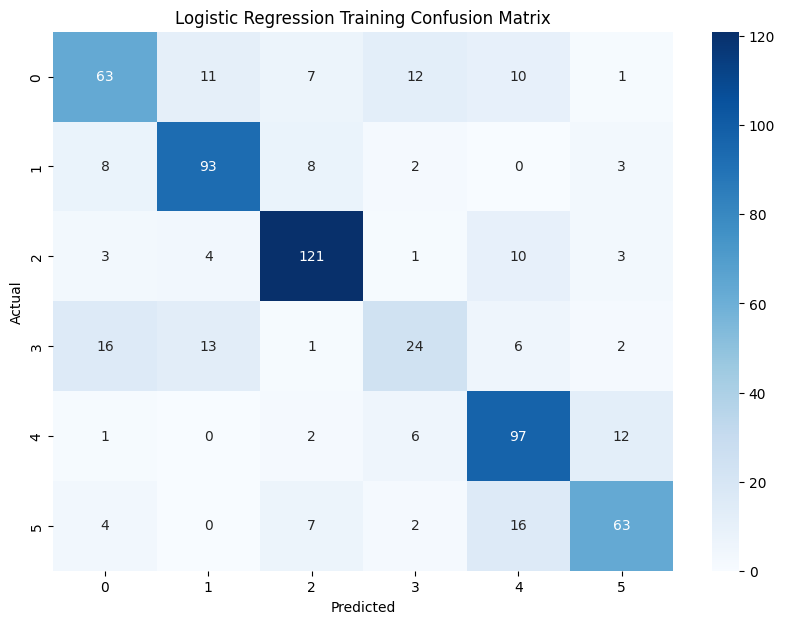

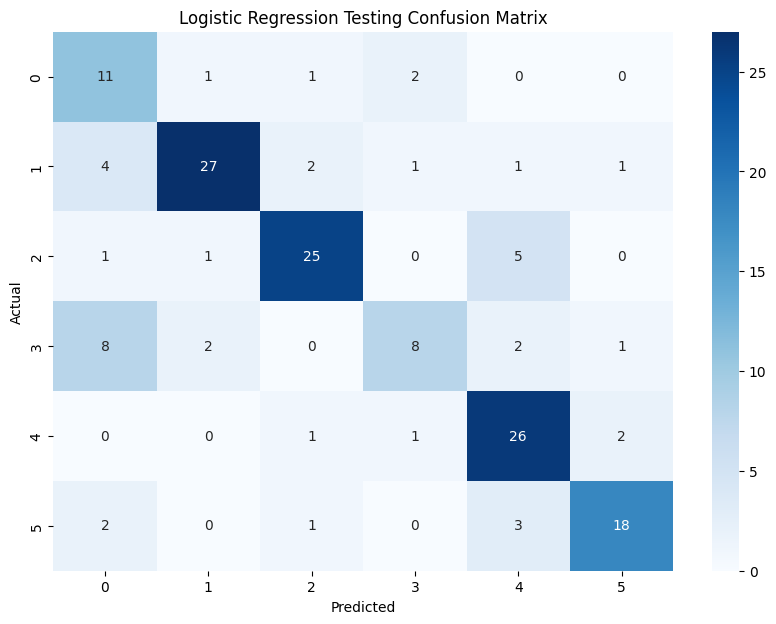

Decision Tree Training Metrics: Accuracy=1.0, Precision=1.0, Recall=1.0, F1 Score=1.0
Decision Tree Testing Metrics: Accuracy=0.5253164556962026, Precision=0.5488647428520845, Recall=0.5253164556962026, F1 Score=0.522847077618498


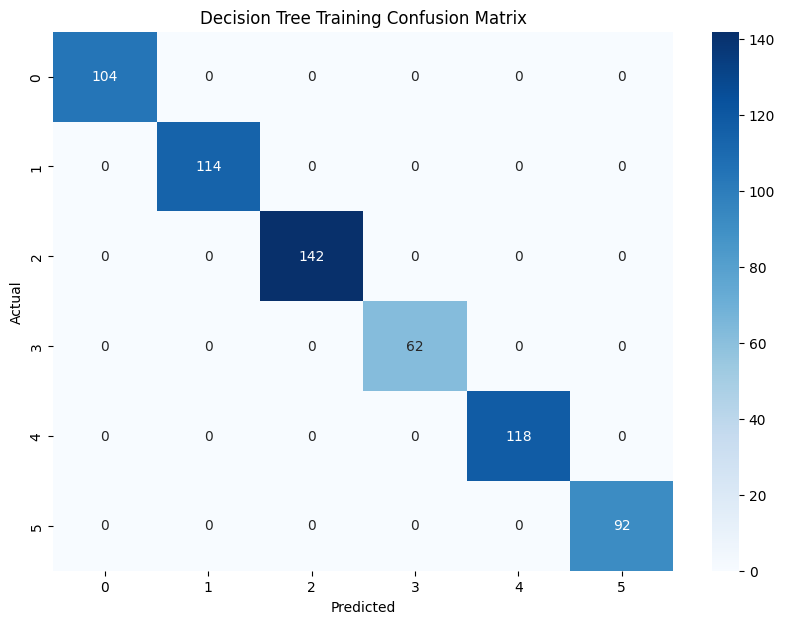

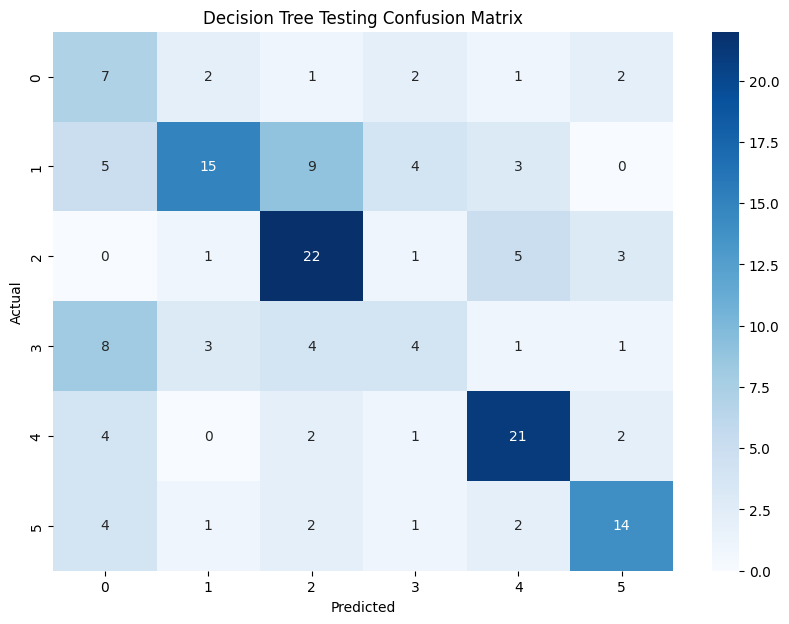

Random Forest Training Metrics: Accuracy=1.0, Precision=1.0, Recall=1.0, F1 Score=1.0
Random Forest Testing Metrics: Accuracy=0.7215189873417721, Precision=0.7404733424470268, Recall=0.7215189873417721, F1 Score=0.7100704114220694


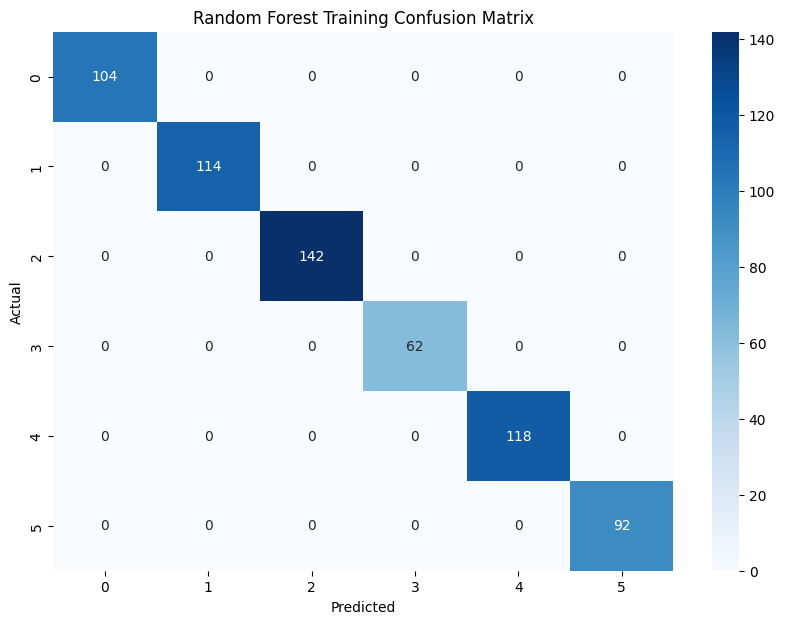

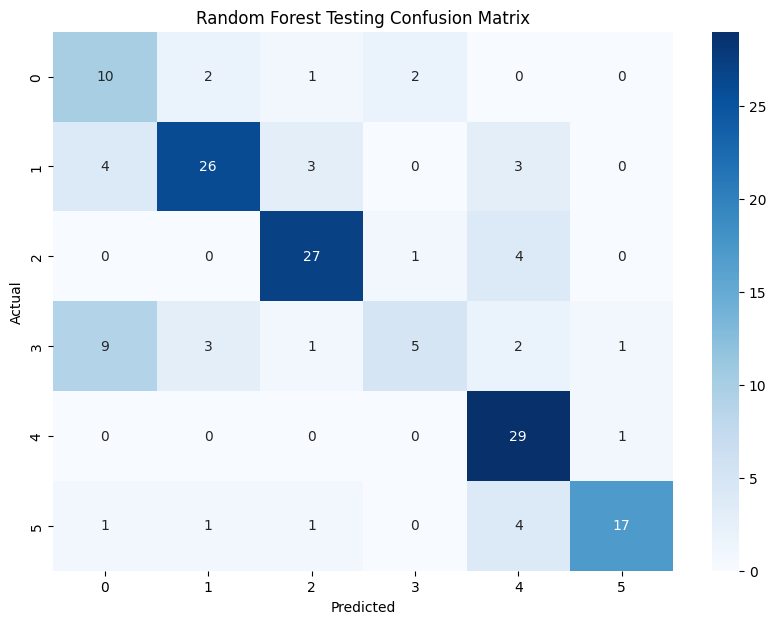

Support Vector Machine Training Metrics: Accuracy=0.8496835443037974, Precision=0.8537119249890177, Recall=0.8496835443037974, F1 Score=0.8452763288832176
Support Vector Machine Testing Metrics: Accuracy=0.740506329113924, Precision=0.7625131325227995, Recall=0.740506329113924, F1 Score=0.7373579682087431


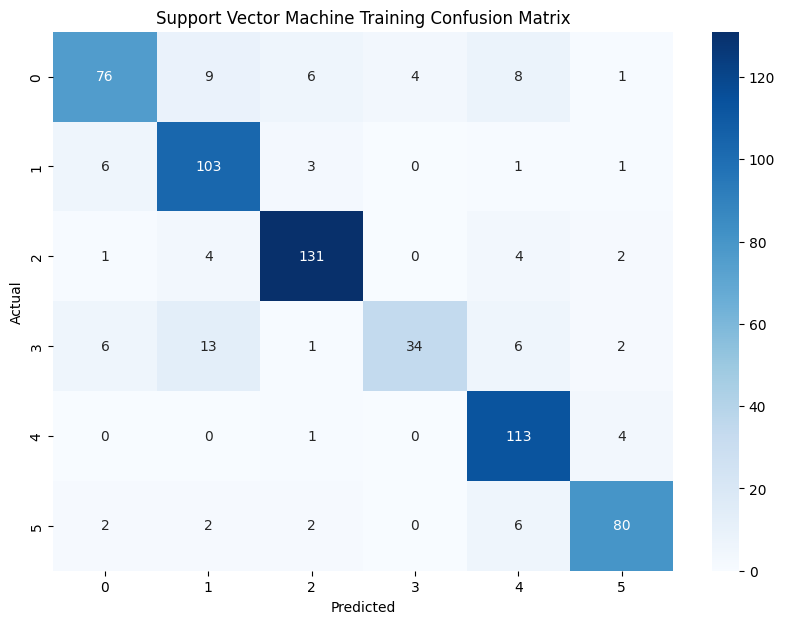

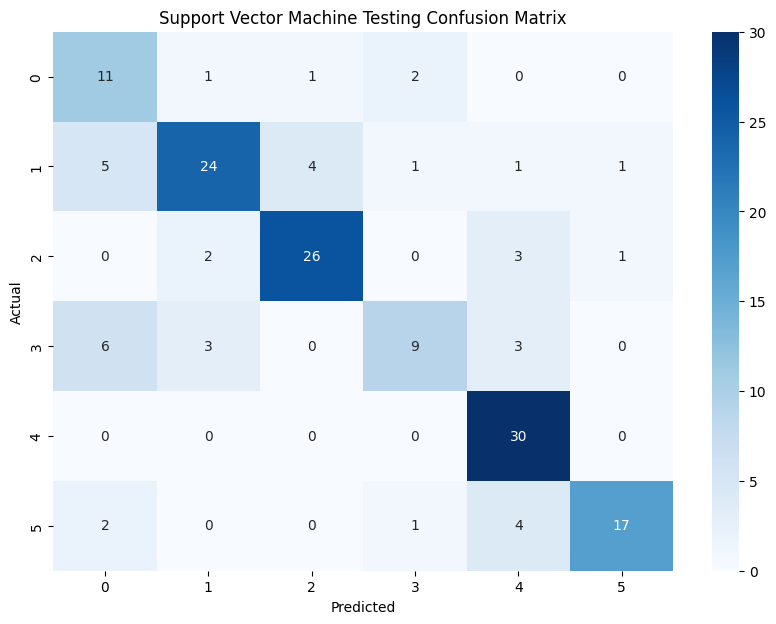

K-Nearest Neighbors Training Metrics: Accuracy=0.75, Precision=0.7642467051023364, Recall=0.75, F1 Score=0.739000750418986
K-Nearest Neighbors Testing Metrics: Accuracy=0.6455696202531646, Precision=0.6944353115239191, Recall=0.6455696202531646, F1 Score=0.6272005584818366


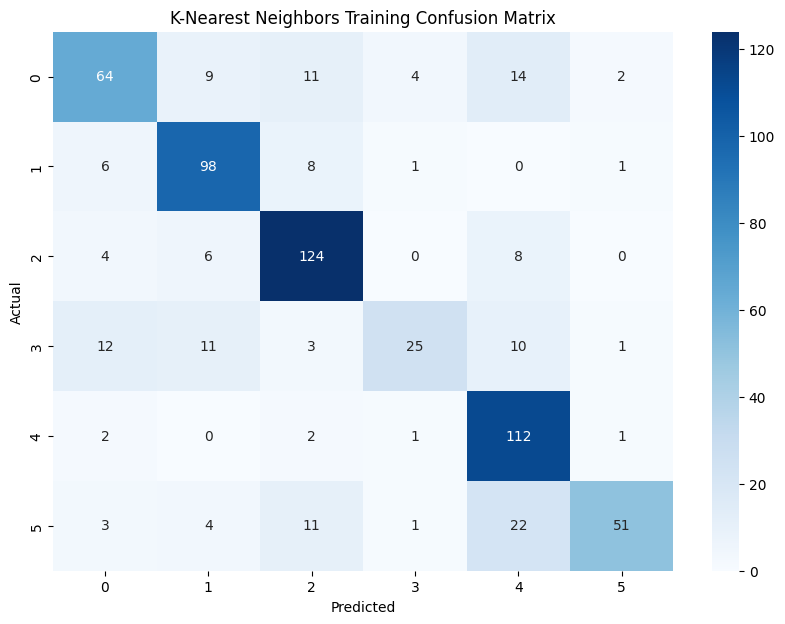

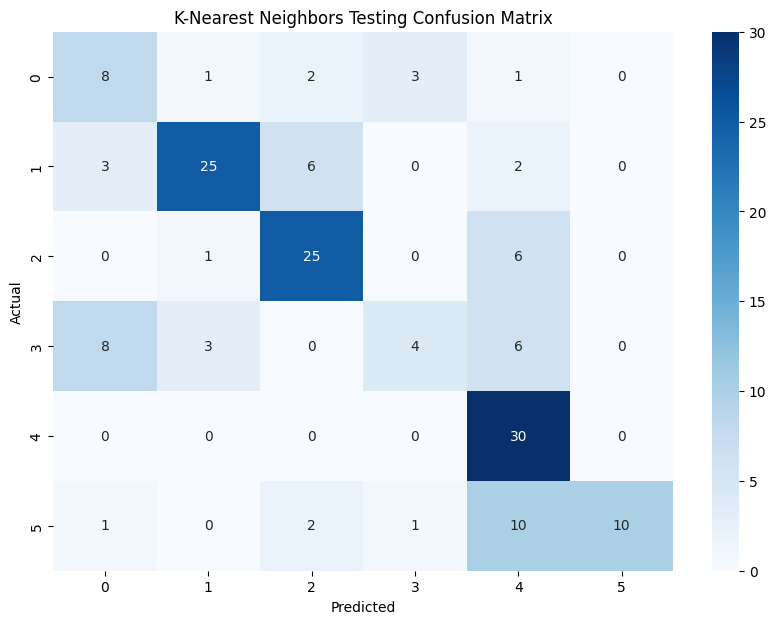

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate the model
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y, y_pred)
    return accuracy, precision, recall, f1, conf_matrix

# Evaluate the models on the training set
train_metrics = {name: evaluate_model(model, X_train, y_train) for name, model in classifiers.items()}

# Evaluate the models on the testing set
test_metrics = {name: evaluate_model(model, X_test, y_test) for name, model in classifiers.items()}

# Print the metrics and plot confusion matrices
for name in classifiers.keys():
    print(f"{name} Training Metrics: Accuracy={train_metrics[name][0]}, Precision={train_metrics[name][1]}, Recall={train_metrics[name][2]}, F1 Score={train_metrics[name][3]}")
    print(f"{name} Testing Metrics: Accuracy={test_metrics[name][0]}, Precision={test_metrics[name][1]}, Recall={test_metrics[name][2]}, F1 Score={test_metrics[name][3]}")
    
    # Plot confusion matrix for training set
    plt.figure(figsize=(10, 7))
    sns.heatmap(train_metrics[name][4], annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Training Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Plot confusion matrix for testing set
    plt.figure(figsize=(10, 7))
    sns.heatmap(test_metrics[name][4], annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Testing Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [67]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store models and their metrics
model_metrics = {}

# Define a function to evaluate and save metrics for each model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    metrics = {
        "Train Accuracy": accuracy_score(y_train, y_pred_train),
        "Test Accuracy": accuracy_score(y_test, y_pred_test),
        "Train Precision": precision_score(y_train, y_pred_train, average='weighted'),
        "Test Precision": precision_score(y_test, y_pred_test, average='weighted'),
        "Train Recall": recall_score(y_train, y_pred_train, average='weighted'),
        "Test Recall": recall_score(y_test, y_pred_test, average='weighted'),
        "Train F1 Score": f1_score(y_train, y_pred_train, average='weighted'),
        "Test F1 Score": f1_score(y_test, y_pred_test, average='weighted'),
    }
    return metrics

# 1. Fine-tune SVM model using GridSearchCV
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm = SVC()
svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_metrics = evaluate_model(svm_grid, X_train, X_test, y_train, y_test)
model_metrics["SVM"] = svm_metrics

# 2. Random Forest Classifier with tuning
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_metrics = evaluate_model(rf_grid, X_train, X_test, y_train, y_test)
model_metrics["Random Forest"] = rf_metrics

# 3. Gradient Boosting Classifier with tuning
gb_params = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
gb = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb, gb_params, cv=5)
gb_metrics = evaluate_model(gb_grid, X_train, X_test, y_train, y_test)
model_metrics["Gradient Boosting"] = gb_metrics

# 4. K-Nearest Neighbors Classifier with tuning
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_metrics = evaluate_model(knn_grid, X_train, X_test, y_train, y_test)
model_metrics["K-Nearest Neighbors"] = knn_metrics

# Display the metrics for each model
for model_name, metrics in model_metrics.items():
    print(f"\n{model_name} Metrics:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")



SVM Metrics:
Train Accuracy: 0.8497
Test Accuracy: 0.7405
Train Precision: 0.8537
Test Precision: 0.7625
Train Recall: 0.8497
Test Recall: 0.7405
Train F1 Score: 0.8453
Test F1 Score: 0.7374

Random Forest Metrics:
Train Accuracy: 1.0000
Test Accuracy: 0.7215
Train Precision: 1.0000
Test Precision: 0.7199
Train Recall: 1.0000
Test Recall: 0.7215
Train F1 Score: 1.0000
Test F1 Score: 0.7118

Gradient Boosting Metrics:
Train Accuracy: 1.0000
Test Accuracy: 0.6835
Train Precision: 1.0000
Test Precision: 0.6978
Train Recall: 1.0000
Test Recall: 0.6835
Train F1 Score: 1.0000
Test F1 Score: 0.6767

K-Nearest Neighbors Metrics:
Train Accuracy: 1.0000
Test Accuracy: 0.6392
Train Precision: 1.0000
Test Precision: 0.6549
Train Recall: 1.0000
Test Recall: 0.6392
Train F1 Score: 1.0000
Test F1 Score: 0.6141
